In [1]:
library(ggplot2)
library(glue)
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
nns <- readRDS("nnns_attention_2cat.rds")

In [3]:
head(nns)

,Age_at_Surgery_days,Premature,Genetic_Syndrome_or_Chromosomal_Abnormality,Cardiac_Anatomy,GI_Complication,Length_of_Stay_days,Length_of_intubation_days,Extubation_failure,bypass_used,bypass_time_min,⋯,Post_Op_NNNS_Stress_Score,Post_Op_NNNS_Arousal_Score,Post_Op_NNNS_Hypertonic_Score,Post_Op_NNNS_Hypotonic_Score,Post_Op_NNNS_Asymmetry_Score,Post_Op_NNNS_Excitability_Score,Post_Op_NNNS_Lethargy_Score,Female,Pre_op_attention_2cat,Post_op_attention_2cat
,<int>,<int>,<int>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,9,1,0,W/o arch obstruction,0,23,1.3,0,1,34,⋯,0.04081633,4.000000,1,0,1,2,5,1,0,0
2,8,1,0,W/o arch obstruction,0,46,5.8,1,1,174,⋯,0.00000000,3.428571,0,0,1,3,4,0,1,1
3,4,1,0,Single ventricle w/ arch obstruction,0,19,5.8,0,1,125,⋯,0.06122449,3.714286,0,0,1,3,3,0,1,1
4,14,1,0,Two ventricle w/ arch obstruction,0,25,4.8,0,1,241,⋯,0.08163265,3.142857,0,0,1,2,4,1,0,1
5,7,1,1,Two ventricle w/ arch obstruction,0,37,3.1,0,1,84,⋯,0.02040816,3.285714,0,0,0,5,5,0,1,0
6,7,1,0,Single ventricle w/ arch obstruction,0,18,2.8,0,1,139,⋯,0.16326531,3.428571,0,0,5,3,7,0,0,1


In [4]:
colnames(nns)

[1] "Age_at_Surgery_days"                         
 [2] "Premature"                                   
 [3] "Genetic_Syndrome_or_Chromosomal_Abnormality" 
 [4] "Cardiac_Anatomy"                             
 [5] "GI_Complication"                             
 [6] "Length_of_Stay_days"                         
 [7] "Length_of_intubation_days"                   
 [8] "Extubation_failure"                          
 [9] "bypass_used"                                 
[10] "bypass_time_min"                             
[11] "Intubated_Pre_operatively"                   
[12] "Pre_Op_NNNS_habituation_score"               
[13] "Pre_Op_NNNS_attention_score"                 
[14] "Pre_Op_NNNS_handling_score"                  
[15] "Pre_Op_NNNS_Quality_of_Movement_Score"       
[16] "Pre_Op_NNNS_Regulation_Score"                
[17] "Pre_Op_NNNS_Non_Optimal_Reflexes_Score"      
[18] "Pre_Op_NNNS_Stress_Score"                    
[19] "Pre_Op_NNNS_Arousal_Score"                   
[20] "Pre_Op_NNNS_Hypertonic_Score"                
[21] "Pre_Op_NNNS_Hypotonic_Score"                 
[22] "Pre_Op_NNNS_Asymmetry_Score"                 
[23] "Pre_Op_NNNS_Excitability_Score"              
[24] "Pre_Op_NNNS_Lethargy_Score"                  
[25] "Percent_of_feeds_taken_by_mouth_at_discharge"
[26] "Date_PO_feeds_started"                       
[27] "Date_Reaching_Full_PO"                       
[28] "Date_Identified_as_not_yet_full_PO"          
[29] "Post_Op_NNNS_habituation_score"              
[30] "Post_Op_NNNS_attention_score"                
[31] "Post_Op_NNNS_handling_score"                 
[32] "Post_Op_NNNS_Quality_of_Movement_Score"      
[33] "Post_Op_NNNS_Regulation_Score"               
[34] "Post_Op_NNNS_Non_Optimal_Reflexes_Score"     
[35] "Post_Op_NNNS_Stress_Score"                   
[36] "Post_Op_NNNS_Arousal_Score"                  
[37] "Post_Op_NNNS_Hypertonic_Score"               
[38] "Post_Op_NNNS_Hypotonic_Score"                
[39] "Post_Op_NNNS_Asymmetry_Score"                
[40] "Post_Op_NNNS_Excitability_Score"             
[41] "Post_Op_NNNS_Lethargy_Score"                 
[42] "Female"                                      
[43] "Pre_op_attention_2cat"                       
[44] "Post_op_attention_2cat"

Warning message:
“Removed 5 rows containing non-finite values (`stat_bin()`).”


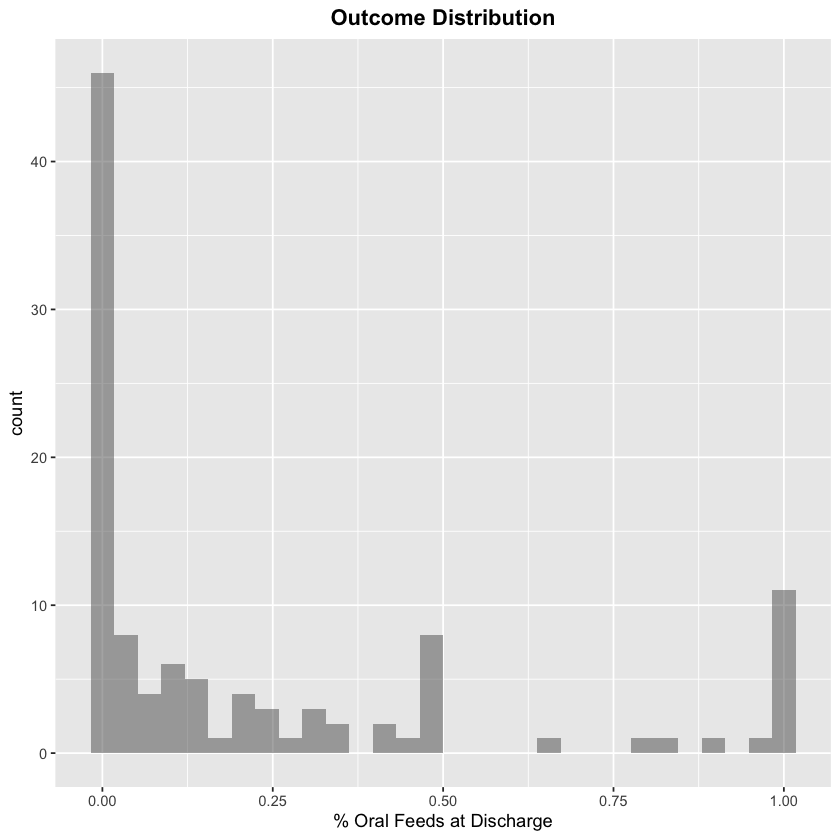

In [9]:
ggplot(nns,aes(x=Percent_of_feeds_taken_by_mouth_at_discharge)) + 
geom_histogram(alpha=0.5,bins=30) + xlab('% Oral Feeds at Discharge') + ggtitle('Outcome Distribution')+ 
  theme(plot.title = element_text(face='bold',hjust = 0.5))

# Linearity Checks
Percent_of_feeds_taken_by_mouth_at_discharge #Response
            ~Pre_Op_NNNS_attention_score+
              Length_of_intubation_days+
              #Genetic_Syndrome_or_Chromosomal_Abnormality+
              Cardiac_Anatomy+
              Age_at_Surgery_days+
              Female<br>
__Covariates:__<br>
- Pre_Op_NNNS_attention_score
- Post_Op_NNNS_attention_score
- Length_of_intubation_days
- Cardiac_Anatomy
- Age_at_Surgery_days
- Female

Warning message:
“Removed 60 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 60 rows containing missing values (`geom_point()`).”


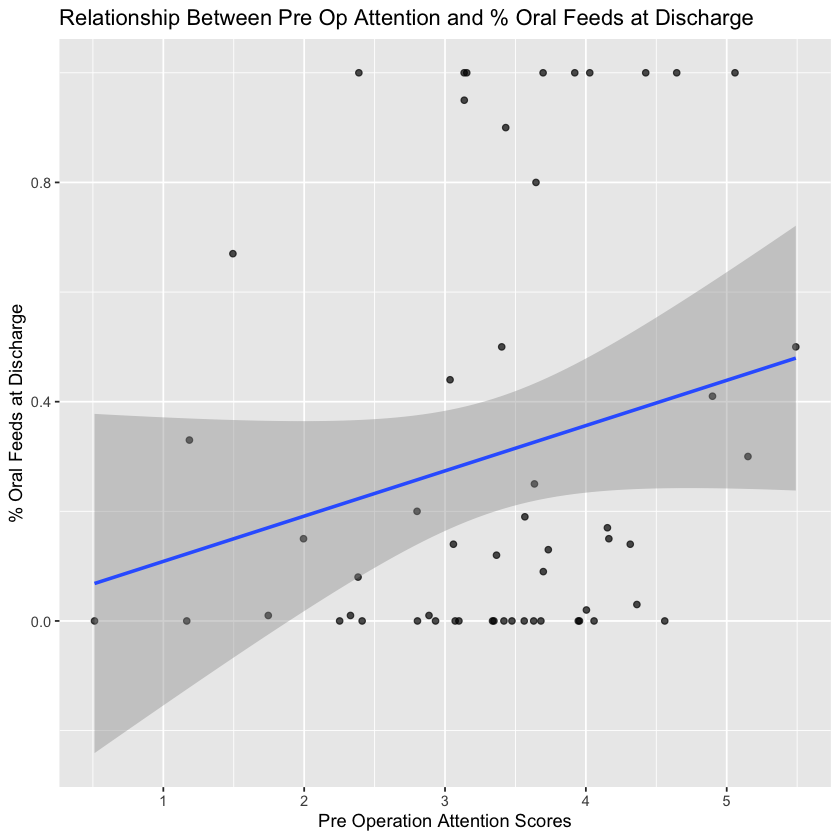

In [16]:
pre_attn_plot <- ggplot(nns,aes(x=Pre_Op_NNNS_attention_score,y=Percent_of_feeds_taken_by_mouth_at_discharge))+
    geom_point(alpha=0.7) +
    labs(x="Pre Operation Attention Scores",y='% Oral Feeds at Discharge')

pre_attn_plot + 
    stat_smooth(geom='smooth',method='lm',formula=y~splines::ns(x,knots=c())) + 
    ggtitle("Relationship Between Pre Op Attention and % Oral Feeds at Discharge")

Warning message:
“Removed 38 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 38 rows containing missing values (`geom_point()`).”


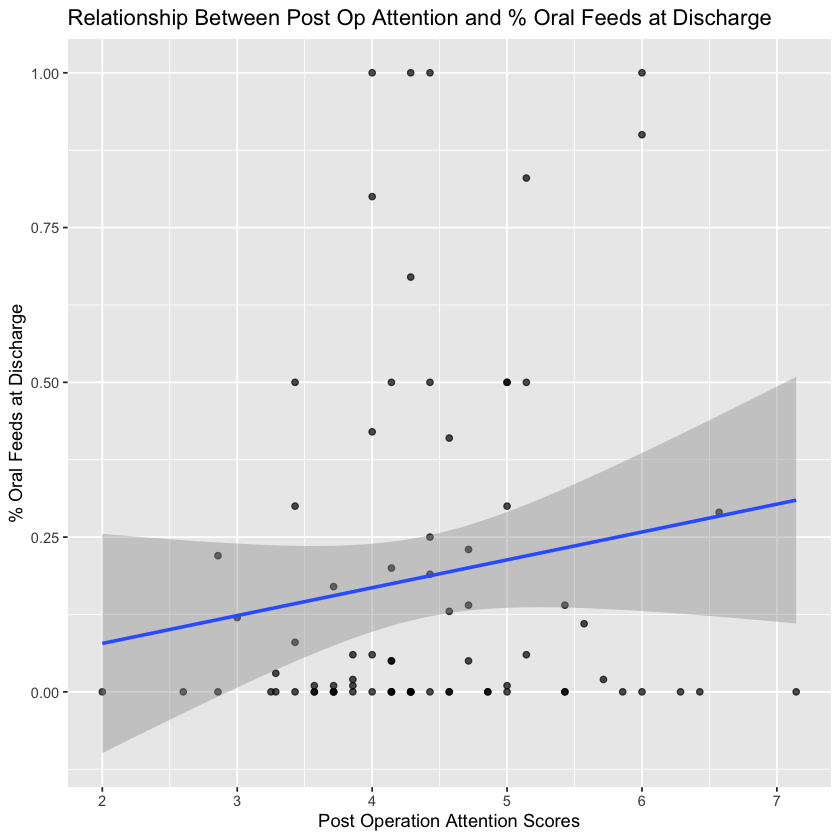

In [17]:
post_attn_plot <- ggplot(nns,aes(x=Post_Op_NNNS_attention_score,y=Percent_of_feeds_taken_by_mouth_at_discharge))+
    geom_point(alpha=0.7) +
    labs(x="Post Operation Attention Scores",y='% Oral Feeds at Discharge')

post_attn_plot + 
    stat_smooth(geom='smooth',method='lm',formula=y~splines::ns(x,knots=c())) + 
    ggtitle("Relationship Between Post Op Attention and % Oral Feeds at Discharge")